# Create a PlantUML diagram for [WikiPathways](https://www.wikipathways.org/) RDF

<a target="_blank" href="https://colab.research.google.com/github/DaniFdezAlvarez/shexer/blob/master/notebooks/shexer4wikipathways.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
pip install shexer

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.4/165.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.9 MB/s eta 0:00:00
  Created wheel for wlighter: filename=wlighter-1.0.1-py3-none-any.whl size=5841 sha256=cadca99249356452f9fb660e5e1db15984065868aff4d021c46fd0ad89e02782
  Stored in directory: /root/.cache/pip/wheels/fb/ad/32/6ddbe06c35ae42613142a23fce188fe01d4a8285a2aec47db8
Successfully built wlighter


In [2]:
from shexer.shaper import Shaper
from shexer.consts import TURTLE

In [3]:
# Namespace-prefix pair to prettify the results
namespaces_dict = {"http://www.w3.org/1999/02/22-rdf-syntax-ns#": "rdf",
                   "http://example.org/": "ex",
                   "http://weso.es/shapes/": "",
                   "http://www.w3.org/2001/XMLSchema#": "xsd",
                   "http://www.w3.org/2002/07/owl#" : "owl"
                   }

# Get WikiPathways RDF

In [4]:
!wget https://data.wikipathways.org/current/rdf/wikipathways-20240810-rdf-wp.zip

--2024-08-27 06:13:06--  https://data.wikipathways.org/current/rdf/wikipathways-20240810-rdf-wp.zip
Resolving data.wikipathways.org (data.wikipathways.org)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to data.wikipathways.org (data.wikipathways.org)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14068286 (13M) [application/zip]
Saving to: ‘wikipathways-20240810-rdf-wp.zip’

wikipathways-202408 100%[===================>]  13.42M  80.4MB/s    in 0.2s    

2024-08-27 06:13:07 (80.4 MB/s) - ‘wikipathways-20240810-rdf-wp.zip’ saved [14068286/14068286]



In [6]:
!unzip wikipathways-20240810-rdf-wp.zip

Archive:  wikipathways-20240810-rdf-wp.zip
   creating: wp/
  inflating: wp/WP508.ttl            
  inflating: wp/WP4206.ttl           
  inflating: wp/WP427.ttl            
  inflating: wp/WP5224.ttl           
  inflating: wp/WP85.ttl             
  inflating: wp/WP1541.ttl           
  inflating: wp/WP4944.ttl           
  inflating: wp/WP4853.ttl           
  inflating: wp/WP2860.ttl           
  inflating: wp/WP3185.ttl           
  inflating: wp/WP2944.ttl           
  inflating: wp/WP1591.ttl           
  inflating: wp/WP5043.ttl           
  inflating: wp/WP5420.ttl           
  inflating: wp/WP332.ttl            
  inflating: wp/WP2113.ttl           
  inflating: wp/WP5181.ttl           
  inflating: wp/WP5199.ttl           
  inflating: wp/WP4545.ttl           
  inflating: wp/WP2212.ttl           
  inflating: wp/WP3248.ttl           
  inflating: wp/WP5143.ttl           
  inflating: wp/WP1016.ttl           
  inflating: wp/WP2839.ttl           
  inflating: wp/WP4504.ttl  

In [8]:
!pwd

/content


In [9]:
import glob
files = glob.glob("/content/wp/*.ttl")
files

['/content/wp/WP1589.ttl',
 '/content/wp/WP3938.ttl',
 '/content/wp/WP2152.ttl',
 '/content/wp/WP2901.ttl',
 '/content/wp/WP5356.ttl',
 '/content/wp/WP367.ttl',
 '/content/wp/WP4231.ttl',
 '/content/wp/WP2872.ttl',
 '/content/wp/WP5314.ttl',
 '/content/wp/WP399.ttl',
 '/content/wp/WP1545.ttl',
 '/content/wp/WP5431.ttl',
 '/content/wp/WP2406.ttl',
 '/content/wp/WP460.ttl',
 '/content/wp/WP402.ttl',
 '/content/wp/WP2112.ttl',
 '/content/wp/WP227.ttl',
 '/content/wp/WP4474.ttl',
 '/content/wp/WP3896.ttl',
 '/content/wp/WP2852.ttl',
 '/content/wp/WP1118.ttl',
 '/content/wp/WP4971.ttl',
 '/content/wp/WP4874.ttl',
 '/content/wp/WP127.ttl',
 '/content/wp/WP1331.ttl',
 '/content/wp/WP2231.ttl',
 '/content/wp/WP3139.ttl',
 '/content/wp/WP1211.ttl',
 '/content/wp/WP4830.ttl',
 '/content/wp/WP152.ttl',
 '/content/wp/WP58.ttl',
 '/content/wp/WP3161.ttl',
 '/content/wp/WP4763.ttl',
 '/content/wp/WP5283.ttl',
 '/content/wp/WP4269.ttl',
 '/content/wp/WP2360.ttl',
 '/content/wp/WP5143.ttl',
 '/content

In [11]:
shaper = Shaper(all_classes_mode=True,
                graph_list_of_files_input=files,
                input_format=TURTLE,
                namespaces_dict=namespaces_dict)  # Default rdf:type

In [12]:
result = shaper.shex_graph(string_output=True,
                           acceptance_threshold=0.1,
                           to_uml_path="wikipathways-20240810-rdf-wp.png")
print(result)

print("Done!")

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX ex: <http://example.org/>
PREFIX weso-s: <http://weso.es/shapes/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>

weso-s:Interaction
{
   rdf:type  [<http://vocabularies.wikipathways.org/wp#Interaction>]  ;          # 100.0 %
   <http://purl.org/dc/terms/isPartOf>  IRI  ;                 # 100.0 %
            # 100.0 % obj: @weso-s:Pathway. Cardinality: {1}
            # 100.0 % obj: @weso-s:Collection. Cardinality: {1}
   <http://vocabularies.wikipathways.org/wp#isAbout>  IRI  +;          # 100.0 %
            # 96.74028967557712 % obj: IRI. Cardinality: {1}
   <http://vocabularies.wikipathways.org/wp#participants>  IRI  *;
            # 79.24106374926893 % obj: IRI. Cardinality: +
            # 63.4379192899164 % obj: IRI. Cardinality: {2}
            # 79.24106374926893 % obj: @weso-s:DataNode. Cardinality: +
            # 48.1405029758833 % obj: @weso-s:GeneProduct. Cardin

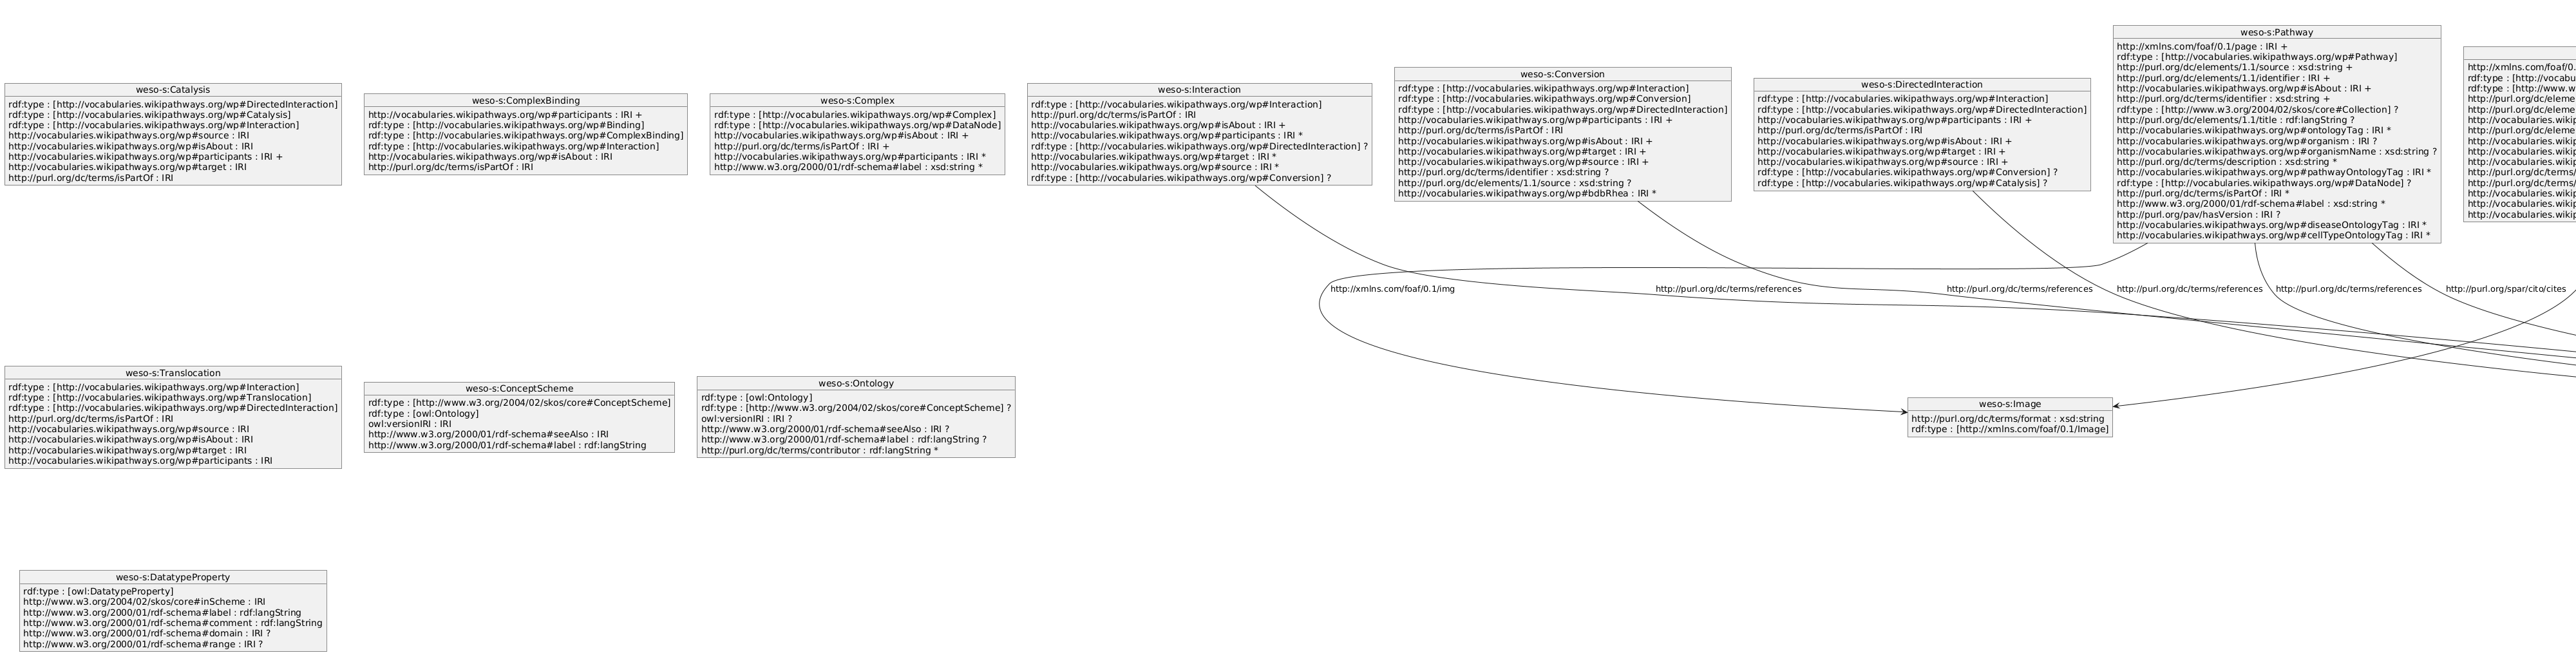

In [13]:
from IPython.display import Image
Image(filename='wikipathways-20240810-rdf-wp.png')